# Visualize contig abundances for contaminated bin

In [9]:
def plot_cm(df, title, savestr, vm=15, fs =7, xlabel = False, small = False):
    clustermap = sns.clustermap(df.iloc[:,3:], col_cluster=False, row_cluster=True, row_linkage=None,vmin=0, vmax=vm, cbar_pos=None,)
    #plt.ylabel("Contigs")
    #plt.xlabel("Samples")
    clustermap.ax_row_dendrogram.set_visible(False)
    # Remove x and y tick labels
    clustermap.ax_heatmap.set_xticklabels([])
    clustermap.ax_heatmap.set_xticks([])
    clustermap.ax_heatmap.set_yticklabels([])
    clustermap.ax_heatmap.set_yticks([])
    if xlabel:
        clustermap.ax_heatmap.set_xlabel("Samples",fontsize = fs)
    clustermap.ax_heatmap.set_title(title,fontsize = fs)

    if small:
        clustermap.fig.set_size_inches(5 / 2.54, 3.5 / 2.54)
    else:
        clustermap.fig.set_size_inches(5 / 2.54, 7 / 2.54)
    norm = mpl.colors.Normalize(vmin=0, vmax=vm, clip=True)
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    plt.rcParams.update({'font.size': fs})
    plt.rcParams.update({'font.family':'arial'})
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "5%", pad="2%")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=sns.cm.rocket), cax=cax)
    cbar.set_label(label='Fairy contig coverage', fontsize = fs)
    cbar.ax.tick_params(labelsize=fs)
    #cbar.ax.set_label("")
    plt.savefig(savestr,bbox_inches='tight',pad_inches=0, dpi = 3000)

/home/jshaw/miniforge3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 236.22x236.22 with 0 Axes>

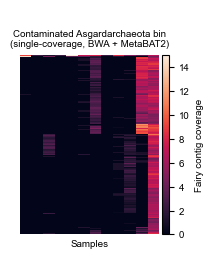

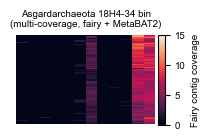

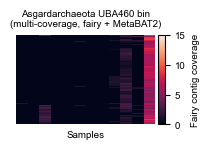

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from scipy.cluster.hierarchy import dendrogram, linkage
fs = 7
plt.rcParams.update({'font.size': fs})
plt.rcParams.update({'font.family':'arial'})

# Load File 1 and extract relevant lines
with open('/home/jshaw/projects/fairy-test/asgard/882_bwa_single_metabat.2.bin', 'r') as file:
    file1_lines = [line.strip().split()[0][1:] for line in file.readlines()]
with open('/home/jshaw/projects/fairy-test/asgard/bin1.bin', 'r') as file:
    file2_lines = [line.strip().split()[0][1:] for line in file.readlines()]
with open('/home/jshaw/projects/fairy-test/asgard/bin4.bin', 'r') as file:
    file3_lines = [line.strip().split()[0][1:] for line in file.readlines()]

# Load Files 2 and 3
df2 = pd.read_csv('../sediment_covfiles/DRR310882_bwa_all_short.tsv', sep='\t')
df3 = pd.read_csv('../sediment_covfiles/DRR310882_fairy_all_short.tsv', sep='\t')

df2  = df2[df2.columns.drop(list(df2.filter(regex='var')))]
df3  = df3[df3.columns.drop(list(df3.filter(regex='var')))]

# Filter out rows based on File 1
df2_filtered = df2[df2['contigName'].isin(file1_lines)]
df3_filtered = df3[df3['contigName'].isin(file1_lines)]
# Filter out rows based on File 1
df2_filtered_g1 = df2[df2['contigName'].isin(file2_lines)]
df3_filtered_g1 = df3[df3['contigName'].isin(file2_lines)]
# Filter out rows based on File 1
df2_filtered_g2 = df2[df2['contigName'].isin(file3_lines)]
df3_filtered_g2 = df3[df3['contigName'].isin(file3_lines)]

df3_filtered_g2.to_csv('df3-g2.csv')
df2_filtered_g2.to_csv('df2-g2.csv')

# Remove columns containing 'var'

# Combine data from Files 2 and 3
#combined_df = pd.concat([df2_filtered, df3_filtered])
cm = 1/2.54
fig = plt.figure(figsize=(6*cm, 6*cm))  # Creates a figure with a width of 8 inches and a height of 6 inches
vm = 15
plot_cm(df3_filtered, "Contaminated Asgardarchaeota bin\n(single-coverage, BWA + MetaBAT2)", "fig2-contam.png", xlabel=True)
plot_cm(df3_filtered_g1, "Asgardarchaeota 18H4-34 bin\n(multi-coverage, fairy + MetaBAT2)", "fig2-pure1.png",small = True)
plot_cm(df3_filtered_g2, "Asgardarchaeota UBA460 bin\n(multi-coverage, fairy + MetaBAT2)", "fig2-pure2.png", xlabel = True, small=True)

# Visualizing all asgard contam/complete

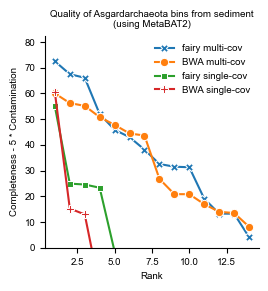

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fs = 7
plt.rcParams.update({'font.size': fs})
plt.rcParams.update({'font.family':'arial'})
# Step 1: Read the 'batchfile.tsv' and create a dictionary for ID to filename mapping
def get_df(batchfile, resfile):
    batchfile_df = pd.read_csv(batchfile, sep='\t', header=None, names=['filename', 'ID'])
    batch_dict = dict(zip(batchfile_df['ID'], batchfile_df['filename']))

    # Step 2: Read the file 'x' to get the list of IDs
    with open(resfile, 'r') as file:
        ids = file.read().splitlines()

    # Step 3: Find corresponding filenames for each ID in 'x'
    filenames = [batch_dict[id] for id in ids if id in batch_dict]

    # Step 4: Read and extract data from each corresponding 'quality_report.tsv'
    rows = []
    for filename in filenames:
        # Assuming the structure of the filename to construct the path for 'quality_report.tsv'
        quality_report_path = f"../sediment_new/{filename.split('/')[2]}_cm2/quality_report.tsv"
        quality_df = pd.read_csv(quality_report_path, sep='\t')
        #print(filename, quality_df, quality_report_path)
        # Extract the row that matches the filename
        row = quality_df[quality_df['Name'] == filename.split('/')[3][0:-3]].iloc[0]
        single = ""
        if 'single' in batchfile:
            single = ' single-cov'
        else:
            single = ' multi-cov'
        if 'bwa' in filename:
            row['Coverage']  = 'BWA' + single
        else:
            row['Coverage']  = 'fairy' + single
        rows.append(row)

    # Step 5: Create a final DataFrame
    final_df = pd.DataFrame(rows)
    return final_df
plt.rcParams.update({'font.size': fs})
rc = plt.rcParams

#sns.set_theme(style='whitegrid', rc=rc)
df1 = get_df('../asgard/batchfile.tsv', '../asgard/asgard_id_all.tsv')
df2 = get_df('../asgard/batchfile_single.tsv', '../asgard/asgard_id_single.tsv')
df = pd.concat([df1,df2])
df.to_csv('asgard_df.tsv',sep='\t',index=False,header=True)
df['Metric'] = df['Completeness'] - 5 * df['Contamination']
df['Rank'] = df.groupby('Coverage')['Metric'].rank(method='min', ascending=False)
fig,ax = plt.subplots(1,1,figsize = (7 * cm,7 * cm))
sns.lineplot(x='Rank', y='Metric', hue = 'Coverage', data=df, markers=True, dashes=False, style="Coverage",ax=ax, hue_order = ['fairy multi-cov', 'BWA multi-cov', 'fairy single-cov', 'BWA single-cov'])
ax.spines[['right','top']].set_visible(False)
plt.ylabel("Completeness - 5 * Contamination")
plt.ylim([0,df['Metric'].max() + 10])
plt.legend(frameon=False)
plt.title("Quality of Asgardarchaeota bins from sediment\n(using MetaBAT2)", fontsize=fs)
plt.savefig('../figures/asgard-ranking.svg')
#plt.xlabel("Rank", fontsize=fs)
#final_df['Contamination'] = final_df['Contamination']/100
#final_df['Completeness'] = final_df['Completeness']/100
#sns.lmplot(data = df,x='Contamination', y = 'Completeness', hue='Coverage', lowess=True)
#plt.show()